In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
# Read the values from CSV file into DataFrame
df=pd.read_csv('/content/drive/MyDrive/store.csv', index_col='Store')#, low_memory=False)
df.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
# Types of data
df.dtypes


StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
# Check the number of missing values in each column
df.isna().sum()

StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
#df.drop('Store', inplace = True, axis =1)
df.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df= pd.get_dummies(data=df, prefix=['St','As', 'PI'], columns=['StoreType', 'Assortment','PromoInterval'])


In [ ]:
df.head(10)

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,St_a,St_b,St_c,St_d,As_a,As_b,As_c,"PI_Feb,May,Aug,Nov","PI_Jan,Apr,Jul,Oct","PI_Mar,Jun,Sept,Dec"
Store,,,,,,,,,,,,,,,,
1,1270.0,9.0,2008.0,0,NaN,NaN,0,0,1,0,1,0,0,0,0,0
2,570.0,11.0,2007.0,1,13.0,2010.0,1,0,0,0,1,0,0,0,1,0
3,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0,0,1,0,0,0,1,0
4,620.0,9.0,2009.0,0,NaN,NaN,0,0,1,0,0,0,1,0,0,0
5,29910.0,4.0,2015.0,0,NaN,NaN,1,0,0,0,1,0,0,0,0,0
6,310.0,12.0,2013.0,0,NaN,NaN,1,0,0,0,1,0,0,0,0,0
7,24000.0,4.0,2013.0,0,NaN,NaN,1,0,0,0,0,0,1,0,0,0
8,7520.0,10.0,2014.0,0,NaN,NaN,1,0,0,0,1,0,0,0,0,0
9,2030.0,8.0,2000.0,0,NaN,NaN,1,0,0,0,0,0,1,0,0,0


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)
X = imputer.fit_transform(df)

df = pd.DataFrame(X, columns=df.columns, index=df.index)

In [ ]:
df.head()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,St_a,St_b,St_c,St_d,As_a,As_b,As_c,"PI_Feb,May,Aug,Nov","PI_Jan,Apr,Jul,Oct","PI_Mar,Jun,Sept,Dec"
Store,,,,,,,,,,,,,,,,
1,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,570.0,11.0,2007.0,1.0,13.0,2010.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,14130.0,12.0,2006.0,1.0,14.0,2011.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,620.0,9.0,2009.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,29910.0,4.0,2015.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df.to_csv('123.csv')

In [ ]:

# Check the number of missing values in each column
df.isna().sum()

CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
St_a                         0
St_b                         0
St_c                         0
St_d                         0
As_a                         0
As_b                         0
As_c                         0
PI_Feb,May,Aug,Nov           0
PI_Jan,Apr,Jul,Oct           0
PI_Mar,Jun,Sept,Dec          0
dtype: int64

In [ ]:
# Types of data
df.dtypes

CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                       float64
Promo2SinceWeek              float64
Promo2SinceYear              float64
St_a                         float64
St_b                         float64
St_c                         float64
St_d                         float64
As_a                         float64
As_b                         float64
As_c                         float64
PI_Feb,May,Aug,Nov           float64
PI_Jan,Apr,Jul,Oct           float64
PI_Mar,Jun,Sept,Dec          float64
dtype: object

Merging

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/train.csv', index_col='Store')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df = df.reset_index()
df1 = df1.reset_index()
final_df = pd.concat([df, df1], axis=1, join="inner")
#final_df = pd.concat([df, df1], axis=1).reindex(df.index)

In [ ]:
#final_df.set_index('Store')
final_df.head(5)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,St_a,St_b,St_c,...,"PI_Mar,Jun,Sept,Dec",Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,570.0,11.0,2007.0,1.0,13.0,2010.0,1.0,0.0,0.0,...,0.0,2,5,2015-07-31,6064,625,1,1,0,1
2,3,14130.0,12.0,2006.0,1.0,14.0,2011.0,1.0,0.0,0.0,...,0.0,3,5,2015-07-31,8314,821,1,1,0,1
3,4,620.0,9.0,2009.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,29910.0,4.0,2015.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
final_df=final_df.T.drop_duplicates().T

In [ ]:
final_df=final_df.set_index('Store')
#final_df.to_csv('output.csv')

In [ ]:
final_df.head()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,St_a,St_b,St_c,St_d,...,"PI_Jan,Apr,Jul,Oct","PI_Mar,Jun,Sept,Dec",DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,,,,,,,,,,,,,,
1,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5,2015-07-31,5263,555,1,1,0,1
2,570.0,11.0,2007.0,1.0,13.0,2010.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5,2015-07-31,6064,625,1,1,0,1
3,14130.0,12.0,2006.0,1.0,14.0,2011.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5,2015-07-31,8314,821,1,1,0,1
4,620.0,9.0,2009.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5,2015-07-31,13995,1498,1,1,0,1
5,29910.0,4.0,2015.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
final_df.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,St_a,St_b,St_c,St_d,...,"PI_Jan,Apr,Jul,Oct","PI_Mar,Jun,Sept,Dec",DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,1115.0,...,1115.0,1115.0,1115,1115,1115,1115,1115,1115,1115,1115
unique,655.0,13.0,24.0,2.0,25.0,8.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1,1,1056,653,2,1,1,2
top,250.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5,2015-07-31,10130,614,1,1,0,1
freq,12.0,354.0,354.0,571.0,544.0,544.0,602.0,1098.0,967.0,767.0,...,780.0,1009.0,1115,1115,3,8,1113,1115,1115,935


In [ ]:
final_df.dtypes

CompetitionDistance          object
CompetitionOpenSinceMonth    object
CompetitionOpenSinceYear     object
Promo2                       object
Promo2SinceWeek              object
Promo2SinceYear              object
St_a                         object
St_b                         object
St_c                         object
St_d                         object
As_a                         object
As_b                         object
As_c                         object
PI_Feb,May,Aug,Nov           object
PI_Jan,Apr,Jul,Oct           object
PI_Mar,Jun,Sept,Dec          object
DayOfWeek                    object
Date                         object
Sales                        object
Customers                    object
Open                         object
Promo                        object
StateHoliday                 object
SchoolHoliday                object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df.Date = le.fit_transform(final_df.Date)#here we label endoded the date columns to 0


final_df.head(10)

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,St_a,St_b,St_c,St_d,...,"PI_Jan,Apr,Jul,Oct","PI_Mar,Jun,Sept,Dec",DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,,,,,,,,,,,,,,
1,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5,0,5263,555,1,1,0,1
2,570.0,11.0,2007.0,1.0,13.0,2010.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5,0,6064,625,1,1,0,1
3,14130.0,12.0,2006.0,1.0,14.0,2011.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5,0,8314,821,1,1,0,1
4,620.0,9.0,2009.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5,0,13995,1498,1,1,0,1
5,29910.0,4.0,2015.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5,0,4822,559,1,1,0,1
6,310.0,12.0,2013.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5,0,5651,589,1,1,0,1
7,24000.0,4.0,2013.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5,0,15344,1414,1,1,0,1
8,7520.0,10.0,2014.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5,0,8492,833,1,1,0,1
9,2030.0,8.0,2000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5,0,8565,687,1,1,0,1


In [ ]:
for col in final_df.columns:
  final_df[col] = pd.to_numeric(final_df[col])
final_df.dtypes

CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                       float64
Promo2SinceWeek              float64
Promo2SinceYear              float64
St_a                         float64
St_b                         float64
St_c                         float64
St_d                         float64
As_a                         float64
As_b                         float64
As_c                         float64
PI_Feb,May,Aug,Nov           float64
PI_Jan,Apr,Jul,Oct           float64
PI_Mar,Jun,Sept,Dec          float64
DayOfWeek                      int64
Date                           int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
dtype: object

In [ ]:
#from sklearn.preprocessing import StandardScaler
 
# define standard scaler
#scaler = StandardScaler()
  
# transform data
#final_df = scaler.fit_transform(final_df)

#final_df = pd.DataFrame(final_df)
#final_df.to_csv('lala.csv')

In [ ]:
#final_df.head()
#final_df.dtypes

In [ ]:
cols = list(final_df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Sales')) #Remove b from list
#cols.pop(cols.index('x')) #Remove x from list
final_df = final_df[cols+['Sales']] #Create new dataframe with columns in the order you want
final_df.head()

final_df.to_csv("final_df.csv")

In [ ]:
final_df.head()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,St_a,St_b,St_c,St_d,...,"PI_Jan,Apr,Jul,Oct","PI_Mar,Jun,Sept,Dec",DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
Store,,,,,,,,,,,,,,,,,,,,,
1,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5,0,555,1,1,0,1,5263
2,570.0,11.0,2007.0,1.0,13.0,2010.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5,0,625,1,1,0,1,6064
3,14130.0,12.0,2006.0,1.0,14.0,2011.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5,0,821,1,1,0,1,8314
4,620.0,9.0,2009.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5,0,1498,1,1,0,1,13995
5,29910.0,4.0,2015.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5,0,559,1,1,0,1,4822


In [ ]:
final_df.shape

(1115, 24)

Introducing ANN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [ ]:
#final_df = (final_df - final_df.min())/(final_df.max()- final_df.min())
#final_df = final_df.fillna(0)
X = final_df.iloc[:, :-1].values
y = final_df.iloc[:, -1].values


In [ ]:
#from numpy.core.fromnumeric import transpose
#from sklearn.preprocessing import StandardScaler
 
# define standard scaler
#scaler = StandardScaler()
#scaler1 = StandardScaler()
#X = np.linalg.norm(X)   
# transform data
#X = scaler.fit_transform(X)

#X = pd.DataFrame(X)

#y = scaler1.fit_transform(y)
#y = pd.DataFrame(y)
#final_df.to_csv('lala.csv')
#X=(X-X.min())/(X.max()-X.min())
#y = (y-y.min())/(y.max()-y.min())

#from sklearn import preprocessing
#X = preprocessing.normalize(X)
"""
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
 
# assign array and range

range_to_normalize = (0, 1)
normalized_array_1d = normalize(
    y, range_to_normalize[0],
  range_to_normalize[1])
 
# display original and normalized array
print(X)
print("Original Array = ", y)
print("Normalized Array = ", normalized_array_1d)
"""

'\ndef normalize(arr, t_min, t_max):\n    norm_arr = []\n    diff = t_max - t_min\n    diff_arr = max(arr) - min(arr)\n    for i in arr:\n        temp = (((i - min(arr))*diff)/diff_arr) + t_min\n        norm_arr.append(temp)\n    return norm_arr\n \n# assign array and range\n\nrange_to_normalize = (0, 1)\nnormalized_array_1d = normalize(\n    y, range_to_normalize[0],\n  range_to_normalize[1])\n \n# display original and normalized array\nprint(X)\nprint("Original Array = ", y)\nprint("Normalized Array = ", normalized_array_1d)\n'

In [ ]:
print(X)


[[1.270e+03 9.000e+00 2.008e+03 ... 1.000e+00 0.000e+00 1.000e+00]
 [5.700e+02 1.100e+01 2.007e+03 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.413e+04 1.200e+01 2.006e+03 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [9.260e+03 0.000e+00 0.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [8.700e+02 0.000e+00 0.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [5.350e+03 0.000e+00 0.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]]


In [ ]:
print(y)

[ 5263  6064  8314 ...  7289 27508  8680]


Splitting the dataset into the Training set and Test set

RNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(y)


[ 5263  6064  8314 ...  7289 27508  8680]


In [ ]:
print(y_train)


[12541  8646 11208  7655  6615  9636  5292  6554 18700  9180 10919 10054
  5946  6625  7322  8306  9189  7064  9252  4075  9843 10471  6588  5927
  6829  8807  5943  5896  5849  7746 12263  8281  6990 11094 11253  9654
  6482 10664  5151  9660  5535 10423  7729  4205  9784 13331  7248  6487
  7294 11473  4239 14308  7428  8763  7502 11075 12602 13492  9287 10439
  6778 14730  6096 10679 11948  8220  8256  5494 27508  8026  7901  7080
 12709  8040  8189  9455 13957  8353  8547  8592 14441 10130 11768 11536
  6759  9564 13873 10893  9827  6834  8801 12426 10252  6611 16726  9504
  6972 11368 11162  8658 25774  5135  9288  7541 10607  7520  4209 10131
 10485 10520  6370  5750 11916  7434  8568  9758  6938  8941  9287 16774
  3671 14533  4879  6548  8159  9969  6686  4680  8837  7544  4267  3874
  7514 11525  9810 10784  6708 10257  6755  5540  9184  7185  6626  8518
  5804  3797 12620  7067  6014  4432  6230  5216 15344 11326 12689  8336
 10418  5338 10914  9109  8689 13988 13443  7465  6

In [ ]:
#y_train.shape
X_train.shape

(892, 23)

RNN

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
x_train=(x_train-x_train.min())/(x_train.max()-x_train.min())
y_train = (y_train-y_train.min())/(y_train.max()-y_train.min())
x_test=(x_test-x_test.min())/(x_test.max()-x_test.min())
y_test = ( y_test- y_test.min())/( y_test.max()- y_test.min())

In [ ]:
print(x_train)

[[1.87092345e-02 0.00000000e+00 0.00000000e+00 ... 1.71644353e-05
  0.00000000e+00 1.71644353e-05]
 [5.01029866e-01 0.00000000e+00 0.00000000e+00 ... 1.71644353e-05
  0.00000000e+00 1.71644353e-05]
 [3.43288706e-03 1.20151047e-04 3.42945417e-02 ... 1.71644353e-05
  0.00000000e+00 1.71644353e-05]
 ...
 [4.66872640e-02 1.54479918e-04 3.45348438e-02 ... 1.71644353e-05
  0.00000000e+00 1.71644353e-05]
 [3.27840714e-02 1.20151047e-04 3.45520082e-02 ... 1.71644353e-05
  0.00000000e+00 1.71644353e-05]
 [1.11568829e-02 1.88808788e-04 3.45520082e-02 ... 1.71644353e-05
  0.00000000e+00 1.71644353e-05]]


In [ ]:

from keras.models import Sequential
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
#from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(23,1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse', metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 200, validation_data=(X_test, y_test))

Epoch 1/200
28/28 [==============================] - 7s 66ms/step - loss: 0.0583 - mean_absolute_error: 0.1831 - val_loss: 0.0268 - val_mean_absolute_error: 0.1326
Epoch 2/200
28/28 [==============================] - 1s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.1096 - val_loss: 0.0228 - val_mean_absolute_error: 0.1165
Epoch 3/200
28/28 [==============================] - 1s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0985 - val_loss: 0.0220 - val_mean_absolute_error: 0.1121
Epoch 4/200
28/28 [==============================] - 1s 31ms/step - loss: 0.0147 - mean_absolute_error: 0.0914 - val_loss: 0.0225 - val_mean_absolute_error: 0.1182
Epoch 5/200
28/28 [==============================] - 1s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0905 - val_loss: 0.0205 - val_mean_absolute_error: 0.1107
Epoch 6/200
28/28 [==============================] - 2s 58ms/step - loss: 0.0135 - mean_absolute_error: 0.0872 - val_loss: 0.0185 - val_mean_absolute_error: 0.1054
Epoch 7/200
28/2

In [ ]:
#model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 23, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 23, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 32)                1632      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3

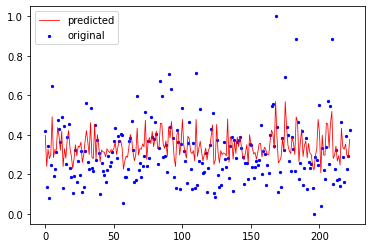

In [ ]:
model.summary()
ypred = model.predict(X_test)
print(model.evaluate(X_train, y_train))
print("MSE: %.4f" % mean_squared_error(y_test, ypred))
#ypred.to_csv("ypredRnn.csv")
#y_test.to_csv("y_testRnn.csv")
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

[0.18308456242084503, 0.10958802700042725, 0.09847832471132278, 0.09142420440912247, 0.09050222486257553, 0.08721153438091278, 0.0799262747168541, 0.07118414342403412, 0.07262103259563446, 0.06744068115949631, 0.06973553448915482, 0.0757124125957489, 0.06581505388021469, 0.06761077791452408, 0.0663718730211258, 0.06089017912745476, 0.05985771864652634, 0.0690782219171524, 0.059405617415905, 0.06195758283138275, 0.0618150532245636, 0.06050870940089226, 0.059254273772239685, 0.058463823050260544, 0.058988314121961594, 0.058381203562021255, 0.06387905776500702, 0.06253477931022644, 0.06104231998324394, 0.05759599432349205, 0.05755002796649933, 0.05702074244618416, 0.05872461572289467, 0.05519389733672142, 0.05967023968696594, 0.05878293141722679, 0.05724572017788887, 0.05383923277258873, 0.06069880723953247, 0.05435102432966232, 0.05888526514172554, 0.05648026987910271, 0.052018649876117706, 0.05384714901447296, 0.05570549517869949, 0.05152244493365288, 0.0517653189599514, 0.0524720847606

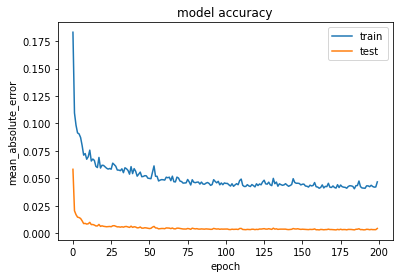

In [ ]:
a = history.history['mean_absolute_error']
plt.plot(history.history['mean_absolute_error'])
#a.to_csv("rnnmae.csv")
print(a)
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

CNN

(1115, 23)
(1115, 23, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 32)            96        
                                                                 
 flatten (Flatten)           (None, 704)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                45120     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 45,281
Trainable params: 45,281
Non-trainable params: 0
_________________________________________________________________
30/30 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_absolute_error: 0.0412
[0.0032715394627302885, 0.0412488617002964]
MSE: 0.0363


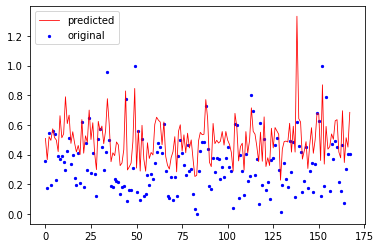

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

x = final_df.iloc[:, :-1].values
y = final_df.iloc[:, -1].values
print(x.shape)

x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.15)
x_train=(x_train-x_train.min())/(x_train.max()-x_train.min())
y_train = (y_train-y_train.min())/(y_train.max()-y_train.min())
x_test=(x_test-x_test.min())/(x_test.max()-x_test.min())
y_test = ( y_test- y_test.min())/( y_test.max()- y_test.min())

model1 = Sequential()
model1.add(Conv1D(32, 2, activation="relu", input_shape=(23,1)))
model1.add(Flatten())
model1.add(Dense(64, activation="relu"))
model1.add(Dense(1))
model1.compile(loss="mean_squared_error", optimizer="adam", metrics=['mean_absolute_error'])
#model.compile(optimizer = 'adam', loss='mse', metrics=['mean_absolute_error'])
model1.summary()
history1 = model1.fit(x_train, y_train, batch_size=12,epochs=200, verbose=0)

ypred = model1.predict(x_test)
print(model1.evaluate(x_train, y_train))
print("MSE: %.4f" % mean_squared_error(y_test, ypred))

x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

[0.10847662389278412, 0.08190551400184631, 0.08017750084400177, 0.07396231591701508, 0.06806477904319763, 0.0630139708518982, 0.056739579886198044, 0.05231548100709915, 0.0482754185795784, 0.04629405587911606, 0.044563207775354385, 0.043835218995809555, 0.04508236050605774, 0.04561972990632057, 0.04469018802046776, 0.044179517775774, 0.043181512504816055, 0.04353326931595802, 0.0453195795416832, 0.04353426769375801, 0.043327175080776215, 0.04343607276678085, 0.04444534331560135, 0.0436113104224205, 0.04327595606446266, 0.04396236687898636, 0.04430583119392395, 0.044892288744449615, 0.04350275918841362, 0.04442278668284416, 0.0440494567155838, 0.043202366679906845, 0.04232769086956978, 0.04322877898812294, 0.04403311386704445, 0.045223187655210495, 0.045008763670921326, 0.04608392342925072, 0.043781477957963943, 0.04475906118750572, 0.04302928224205971, 0.044899724423885345, 0.04375837370753288, 0.04281461983919144, 0.04479897767305374, 0.044002171605825424, 0.043279990553855896, 0.0436

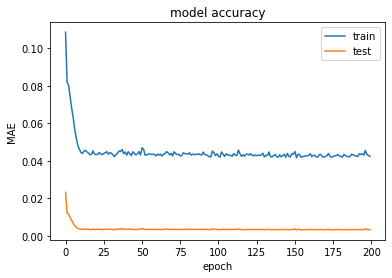

In [ ]:
b = history1.history['mean_absolute_error']
print(b)
plt.plot(history1.history['mean_absolute_error'])
plt.plot(history1.history['loss'])
plt.title('model accuracy')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()